In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

all_data = pd.read_csv("C:\\Users\\Harari\\Desktop\\S3B3.csv") 

def prepareDf(dataframe):
    dataframe.index.names = ['time']
    out = dataframe.reset_index()
    out = out.melt("time")
    # Seaborn divides lines by colour
    out['tipo'] = ['S' if 'S' in x else 'B' for x in out['variable']]
    return out

In [4]:
# Sets regex expression and selects the data
reg1 = f"^1_(.*?)_Precio"
reg2 = f"^1_(.*?)_Utili"
filtered_data = all_data.filter(regex=reg1)
utili_data = all_data.filter(regex=reg2)
# Gets all iterations to a melted pd.dataFrame
filtered_data = prepareDf(filtered_data)
utili_data = prepareDf(utili_data)

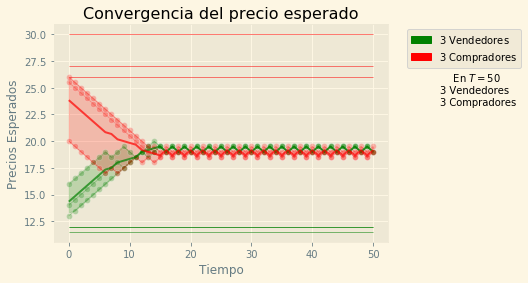

In [5]:
# plot filtered data
# Adds individual trajectories as dotted lines
newPal = dict(S = "green", B = "red")
tmax = 50

with plt.style.context('Solarize_Light2'):
    sns.lineplot(x="time", y="value",
                hue="tipo", units="variable", estimator=None, lw=1,
                marker="o", alpha=0.25, palette=newPal, legend = False,
                data=filtered_data)

    # Adds the aggregated lines and the standar deviation
    sns.lineplot(x="time", y="value", alpha=0.7,
                hue="tipo", legend = False, palette=newPal,
                data=filtered_data)
    # Adds the 
    sns.lineplot(x="time", y="value",
                hue="tipo", units="variable", estimator=None, lw=1,
                alpha=0.5, palette=newPal, legend = False,
                data=utili_data)
    
    numB, numS = 3, 3
    static_pluralB = 'es' if numB > 1 else ''
    static_pluralS = 'es' if numS > 1 else ''

    # Creates the Legend
    seller = mpatches.Patch(color='g', 
            label=f'${numS}$ Vendedor{static_pluralS}')
    buyer = mpatches.Patch(color='r', 
            label=f'${numB}$ Comprador{static_pluralB}')

    plt.legend(handles=[seller, buyer],
                       bbox_to_anchor=(1.04, 1), loc="upper left")

    # Creates the remaining counter
    remainingBuyers = 3
    remainingSellers = 3
    # Checks for quantities and plurals in dinamic
    dinamic_pluralB = 'es' if numB > 1 else ''
    dinamic_pluralS = 'es' if numS > 1 else ''

    counter = (f"    En $T = {tmax}$\n{remainingSellers} Vendedor{dinamic_pluralS}"
                f"\n{remainingBuyers} Comprador{dinamic_pluralB}")

    # place a text box in upper left in axes coords

    plt.annotate(counter, xy=(1, .63), xycoords='axes fraction',
                    xytext=(52, 0), textcoords='offset points')            
    plt.xlabel("Tiempo")
    plt.ylabel("Precios Esperados")
    plt.title("Convergencia del precio esperado")

#   sns_plot.savefig("output.png")